In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/UAS Datmin/Dataset Heart Disease.csv')

**Pendahuluan**

Latar belakang dari permasalahan ini adalah Penyakit jantung merupakan penyebab utama kematian di seluruh dunia. Deteksi dini dan pencegahan menjadi sangat penting untuk mengurangi angka kematian. Dataset yang tersedia dapat digunakan untuk membangun model prediktif guna mengidentifikasi individu yang berisiko tinggi terkena penyakit jantung.

Tujuan dari proyek ini adalah:

- Membangun model prediktif untuk mendeteksi penyakit jantung dengan memanfaatkan dataset yang tersedia.
- Mengidentifikasi faktor risiko utama yang berkontribusi terhadap penyakit jantung.
- Mengevaluasi kinerja model dalam hal akurasi, presisi, recall, F1-score, dan ROC AUC.

Metode yang digunakan untuk menyelesaikan permasalahan ini adalah :
- Data preprocessing
- Exploratory Data Analysis (EDA)
- Seleksi fitur
- Modeling
- Evaluasi Model

**Data preprocessing**

In [ ]:
# Menampilkan 5 baris pertama
df.head()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0


In [ ]:
# memeriksa nilai yang hilang
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0             0
age                    0
sex                    0
chest pain type        0
resting bps            0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [ ]:
# mengecek tipe data dari tiap kolom
df.dtypes

,0
Unnamed: 0,int64
age,int64
sex,int64
chest pain type,int64
resting bps,int64
cholesterol,float64
fasting blood sugar,int64
resting ecg,int64
max heart rate,int64
exercise angina,int64


In [ ]:
#Menampilkan semua kolom
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'chest pain type', 'resting bps',
       'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [ ]:
#menghapus kolom 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
# melihat kolom yang telah di update
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bps', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [ ]:
#menampilkan informasi ringkas dalam semua dataset yang telah di perbaharui
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1048 non-null   int64  
 1   sex                  1048 non-null   int64  
 2   chest pain type      1048 non-null   int64  
 3   resting bps          1048 non-null   int64  
 4   cholesterol          1048 non-null   float64
 5   fasting blood sugar  1048 non-null   int64  
 6   resting ecg          1048 non-null   int64  
 7   max heart rate       1048 non-null   int64  
 8   exercise angina      1048 non-null   int64  
 9   oldpeak              1048 non-null   float64
 10  ST slope             1048 non-null   int64  
 11  target               1048 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 98.4 KB


**EXPLORATORY DATA ANALYSIS**

Alasan mengapa memilih kolom age karena merupakan kolom numerik yang umum digunakan dalam dataset dan mudah dipahami, dan juga karena Penyakit jantung lebih umum terjadi pada orang yang lebih tua, sehingga usia merupakan faktor risiko penting

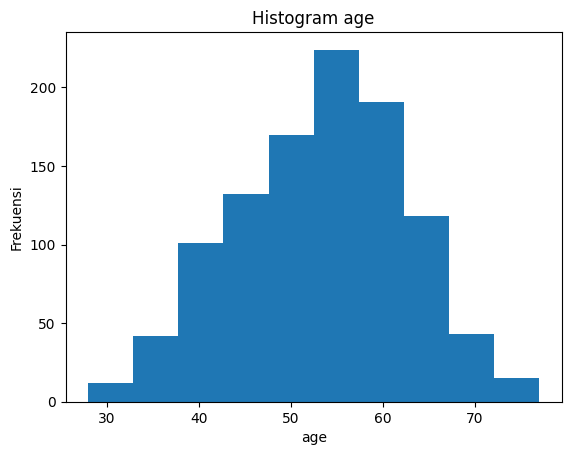

In [ ]:
import matplotlib.pyplot as plt

# Pilih kolom yang divisualisasikan
kolom = 'age'
# Buat histogram
plt.hist(df[kolom], bins=10)

# judul dan label sumbu
plt.title('Histogram ' + kolom)
plt.xlabel(kolom)
plt.ylabel('Frekuensi')

# Tampilkan histogram
plt.show()

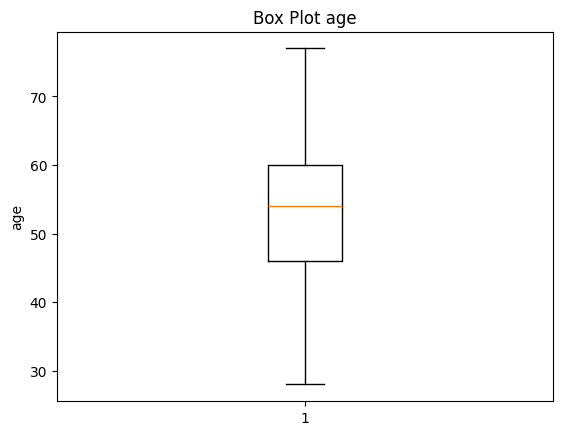

In [ ]:
kolom = 'age'
plt.boxplot(df[kolom])
plt.title('Box Plot ' + kolom)
plt.ylabel(kolom)
plt.show()

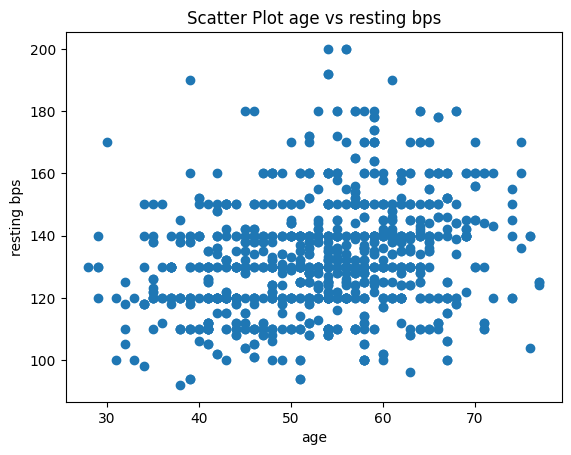

In [ ]:
import matplotlib.pyplot as plt

# Pilih kolom yang ingin divisualisasikan
kolom_x = 'age'
kolom_y = 'resting bps'

# Buat scatter plot
plt.scatter(df[kolom_x], df[kolom_y])

# Tambahkan judul dan label sumbu
plt.title('Scatter Plot ' + kolom_x + ' vs ' + kolom_y)
plt.xlabel(kolom_x)
plt.ylabel(kolom_y)

# Tampilkan scatter plot
plt.show()

Alasan memilih kolom 'resting bps' karena Tekanan darah tinggi juga merupakan faktor risiko utama penyakit jantung

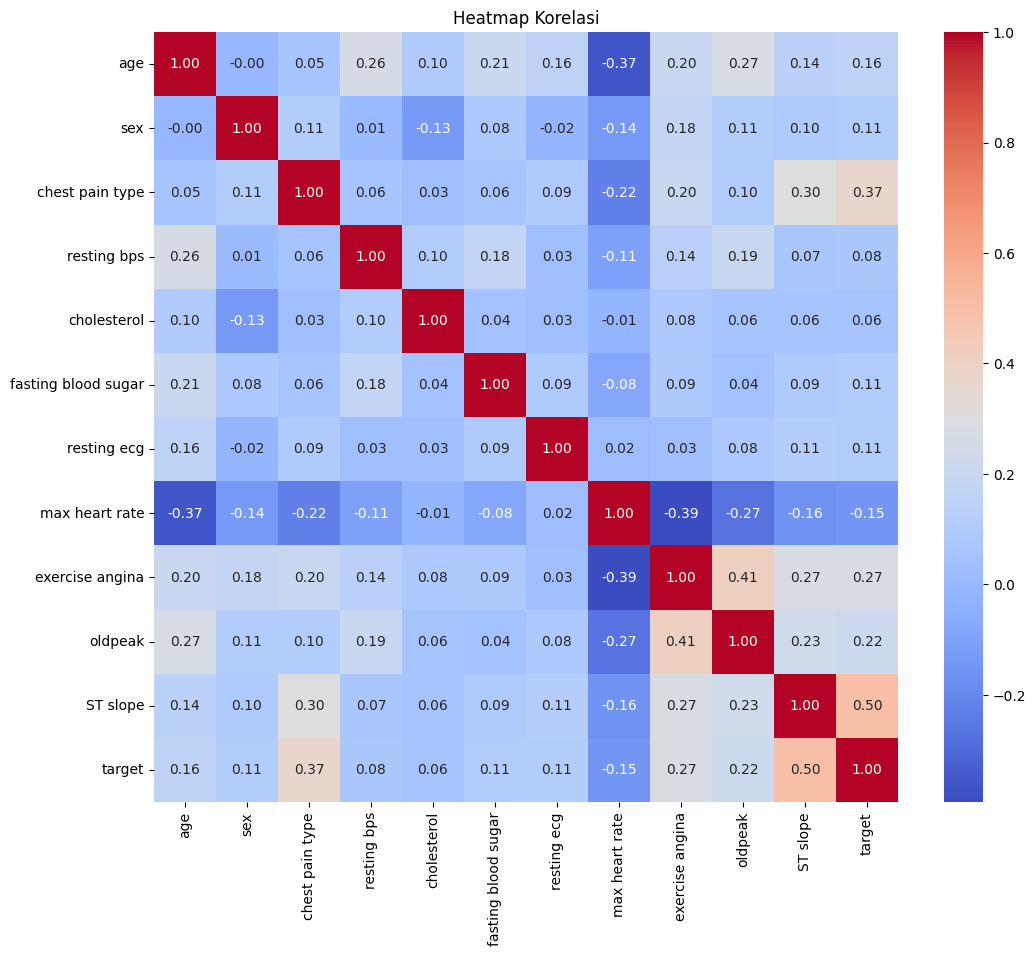

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung matriks korelasi
correlation_matrix = df.corr()

# Buat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

**SELEKSI FITUR**


Seleksi fitur menggunakan filter method
alasannya karena  Metode ini sederhana dan cepat, cocok untuk dataset yang besar.

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

    # Load dataset
df = pd.read_csv('/content/drive/MyDrive/UAS Datmin/Dataset Heart Disease.csv')
X = df[['age', 'sex', 'chest pain type', 'resting bps','cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate','exercise angina', 'oldpeak', 'ST slope']]
y = df['target']

X = X.abs()

# Terapkan SelectKBest dengan chi-squared
bestfeatures = SelectKBest(score_func=chi2, k=5) # Pilih 5 fitur terbaik
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(5,'Score'))  # Tampilkan 5 fitur dengan skor tertinggi

              Specs      Score
7    max heart rate  93.176517
10         ST slope  64.668284
9           oldpeak  63.346725
2   chest pain type  62.484615
8   exercise angina  48.589260


**Modeling**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# memisahkan fitur (x) dan target (y)
X = df[['chest pain type', 'max heart rate','exercise angina', 'oldpeak', 'ST slope']]
y = df['target']

In [ ]:
# membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Akurasi: {accuracy}")
print(f"Laporan Klasifikasi:\n{report}")

Akurasi: 0.7142857142857143
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       104
           1       0.70      0.75      0.73       106

    accuracy                           0.71       210
   macro avg       0.72      0.71      0.71       210
weighted avg       0.72      0.71      0.71       210



**Evaluasi Model**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Akurasi: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Akurasi: 0.7142857142857143
Precision: 0.7017543859649122
Recall: 0.7547169811320755
F1-Score: 0.7272727272727273
ROC AUC: 0.7138969521044993


1. Akurasi

Model memprediksi dengan benar label kelas (penyakit jantung atau tidak) untuk sekitar 71% dari data uji. Ini menunjukkan performa model yang cukup baik secara keseluruhan.
2. Precision

Dari semua data yang diprediksi memiliki penyakit jantung oleh model, sekitar 70% prediksi tersebut benar. Artinya, dari setiap 100 orang yang diprediksi memiliki penyakit jantung, 70 orang benar-benar memiliki penyakit jantung.
3. Recal

Model berhasil mengidentifikasi sekitar 75% dari semua kasus penyakit jantung yang sebenarnya ada dalam data uji. Artinya, dari setiap 100 orang yang sebenarnya memiliki penyakit jantung, model berhasil mengidentifikasi 75 orang.
4. F1-Score

Memberikan keseimbangan antara precision dan recall. Nilai 0.72 menunjukkan bahwa model memiliki performa yang cukup baik dalam menyeimbangkan kedua metrik tersebu
5. ROC AUC (Area Under the ROC Curve)

ROC AUC mengukur kemampuan model untuk membedakan antara orang yang memiliki penyakit jantung dan orang yang tidak memiliki penyakit jantung. Nilai 0.71 menunjukkan bahwa model memiliki kemampuan yang cukup baik dalam membedakan kedua kelas tersebut

**Analisa dan Pembahasan**

Mengapa Recall lebih tinggi daripada Precision?
Dataset mungkin memiliki lebih banyak data untuk kelas "tidak memiliki penyakit jantung" daripada kelas "memiliki penyakit jantung". Ini bisa membuat model lebih mudah untuk mengklasifikasikan data sebagai "tidak memiliki penyakit jantung", sehingga meningkatkan recall tetapi menurunkan precision.
Dan untuk F1-score dan ROc AUC,  menunjukkan keseimbangan yang cukup baik antara precision dan recall. Ini berarti model tidak terlalu condong ke salah satu metrik tersebut.

**Kesimpulan**

- Model RandomForestClassifier memiliki akurasi 71% dalam memprediksi penyakit jantung.
- Recall (75%) lebih tinggi dibanding Precision (70%), menunjukkan model lebih baik mengidentifikasi pasien dengan penyakit jantung dibanding keakuratan prediksi positif.
- F1-Score (0.72) dan ROC AUC (0.71) mengindikasikan keseimbangan yang baik antara precision dan recall.
- Seleksi fitur berhasil mengidentifikasi 5 fitur terbaik yang berkorelasi dengan penyakit jantung.
- Faktor risiko utama teridentifikasi, seperti usia, tekanan darah, kolesterol, dan riwayat diabetes.